In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(0)

In [0]:
seq_length=7
data_dim=5
hidden_dim=10
output_dim=1
learning_rate=0.01
iterations=500

xy=np.loadtxt("https://raw.githubusercontent.com/deeplearningzerotoall/PyTorch/master/data-02-stock_daily.csv", delimiter=",")
xy=xy[::-1]
train_size=int(len(xy)*0.7)
train_set=xy[0:train_size]
test_set=xy[train_size - seq_length:]

In [0]:
def minmax_scaler(data):
  numerator=data - np.min(data, 0)
  denominator=np.max(data, 0) - np.min(data, 0)
  return numerator/(denominator + 1e-7)

def build_dataset(time_series, seq_length):
  dataX=[]
  dataY=[]
  for i in range(0, len(time_series) - seq_length):
    _x=time_series[i:i + seq_length, :]
    _y=time_series[i+ seq_length, [-1]]
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)
  return np.array(dataX), np.array(dataY)

In [32]:
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.14300665 0.1385687  0.13617971 0.22934478 0.1269863 ]] -> [0.14877845]
[[0.13075878 0.14979734 0.13950916 0.35107104 0.13395688]
 [0.15042455 0.16374823 0.15035616 0.23008871 0.14071631]
 [0.1454909  0.1445232  0.11061925 0.34481488 0.15451699]
 [0.16681256 0.20764194 0.1877305  0.43786856 0.2252799 ]
 [0.18685757 0.18212234 0.15604838 0.60962618 0.15331985]
 [0.14300665 0.1385687  0.13617971 0.22934478 0.1269863 ]
 [0.11726889 0.14037215 0.14301739 0.21129334 0.14877845]] -> [0.12107172]
[[0.15042455 0.16374823 0.15035616 0.23008871 0.14071631]
 [0.1454909  0.1445232  0.11061925 0.34481488 0.15451699]
 [0.16681256 0.20764194 0.1877305  0.43786856 0.2252799 ]
 [0.18685757 0.18212234 0.15604838 0.60962618 0.15331985]
 [0.14300665 0.1385687  0.13617971 0.22934478 0.1269863 ]
 [0.11726889 0.14037215 0.14301739 0.21129334 0.14877845]
 [0.13503701 0.12893922 0.13850677 0.1832392  0.12107172]] -> [0.11480507]
[[0.1454909  0.1445232  0.11061925 0.344814

In [0]:
class Net(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim, layers):
    super(Net, self).__init__()
    self.rnn=nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
    self.fc=nn.Linear(hidden_dim, output_dim, bias=True)

  def forward(self, x):
    x,_status=self.rnn(x)
    x=self.fc(x[:, -1])
    return x

In [0]:
net=Net(data_dim, hidden_dim, output_dim, 1)
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(net.parameters(), lr=learning_rate)

In [35]:
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.5927746891975403
1 0.5106987357139587
2 0.43471840023994446
3 0.3634774088859558
4 0.2960578203201294
5 0.23213113844394684
6 0.17236030101776123
7 0.11861537396907806
8 0.07402744144201279
9 0.042694613337516785
10 0.028614042326807976
11 0.03318355232477188
12 0.05068047344684601
13 0.06785739213228226
14 0.07535404711961746
15 0.0724414587020874
16 0.06263801455497742
17 0.050175003707408905
18 0.038423310965299606
19 0.02938747964799404
20 0.023757554590702057
21 0.021252142265439034
22 0.021054739132523537
23 0.02219272218644619
24 0.023784825578331947
25 0.025158526375889778
26 0.025877341628074646
27 0.025721274316310883
28 0.02465035207569599
29 0.022765502333641052
30 0.020271699875593185
31 0.017441947013139725
32 0.0145795913413167
33 0.0119771808385849
34 0.009872937574982643
35 0.008410370908677578
36 0.007610210683196783
37 0.0073654670268297195
38 0.00746674882248044
39 0.007656102534383535
40 0.007695792242884636
41 0.007430174853652716
42 0.006819816771894693
43 0.

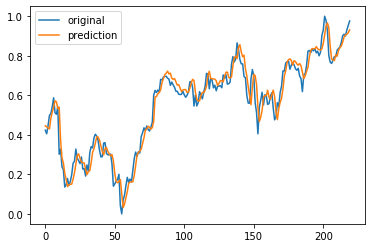

In [36]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()